In [17]:
import numpy as np
from math import sin, cos, sqrt
import matplotlib.pyplot as plt
import sympy as sy
import scipy as sp
import scipy.optimize
from scipy.optimize import fsolve
from scipy.integrate import odeint

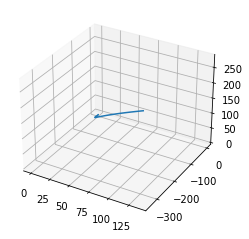

In [18]:
c1 = 837019575
c2 = 4133430
c3 = 32805
c4 = 486
c5 = 18
c6 = 55801305
c7 = 688905
c8 = 3645
c9 = 81

r = 0.0125
L0 = 0.15


def mapping_from_L_to_X(L, xi):
    """アクチュエータ空間からタスク空間への写像
    
    L = [L[0,0], L[1,0], L[2,0]] -> X = [x, y, z]
    """
    
    
    A1 = np.linalg.norm(L)**2 - L[0,0]*L[1,0] - L[0,0]*L[2,0] - L[1,0]*L[2,0]
    A2 = 2*L[0,0] - L[1,0] - L[2,0]
    A3 = L[1,0] - L[2,0]
    A4 = 3*L0 + L[0,0] + L[1,0] + L[2,0]
    
    x = -(A2 * A1**4 * A4 * xi**10) / ((c1 * r**9)) + \
        (A2 * A1**3 * A4 * xi**8) / (c2 * r**7) - \
            (A2 * A1**2 * A4 * xi**6) / (c3 * r**5) + \
                (A2 * A1 * A4 * xi**4) / (c4 * r**3) - \
                    (A2 * A4 * xi**2) / (c5 * r)
    
    y = -(sqrt(3) * A4 * A3 * A1**4 * xi**10) / (c1 * r**9) + \
        (sqrt(3) * A4 * A3 * A1**3 * xi**8) / (c2 * r**7) - \
            (sqrt(3) * A4 * A3 * A1**2 * xi**6) / (c3 * r**5) + \
                (sqrt(3) * A4 * A1 * A2 * xi**4) / (c4 * r**3) - \
                    (sqrt(3) * A4 * A3 * xi**2) / (c5 * r)
    
    z = (2 * A1**4 * A4 * xi**9) / (c6 * r**8) - \
        (4 * A1**3 * A4 * xi**7) / (c7 * r**6) + \
            (2 * A1**2 * A4 * xi**5) / (c8 * r**4) - \
                (2 * A1 *A4 * xi**3) / (c9 * r**2) + \
                    (A4 * xi) / 3

    return np.array([[x, y, z]]).T



L = np.array([[1, 1.2, 1]]).T
xi_all = np.arange(0, 1, 0.01)

Xs = np.concatenate([mapping_from_L_to_X(L, xi).T for xi in xi_all])


fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot(Xs[:, 0], Xs[:, 1], Xs[:, 2])
plt.show()